In [ ]:
#IN THIS PROJECT, I WILL DO THE FOLLOWING :
#import two years of data for four stocks-from yahoo finance
#Build initial portfolio with equal weighting to each
#Analyze and visualize the equal-weighted portfolio 





In [2]:
#import packages needed 
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#set start and end date parameters

startdate='2019-01-01'
enddate='2021-12-31'

#list the four stock ticker symbols

stock_list=['AMD', 'AAPL', 'MSFT', 'ORCL']

#create an empty dict to store stock info
stocks={}

#loop through each stock in the stock_list and return adj close

for i_stock in stock_list:
    stocks[i_stock]=pdr.DataReader(i_stock, 'yahoo', startdate, enddate)[['Adj Close']]


In [4]:
#Examine the 'AMD' ADJ close

stocks['AMD'].head()

,Adj Close
Date,
2019-01-02,18.830000
2019-01-03,17.049999
2019-01-04,19.000000
2019-01-07,20.570000
2019-01-08,20.750000


In [6]:
#Create 3 more columns

#Create normalized return column for each stock

for stock_name, stock_data in stocks.items():
    first_adj_close=stock_data.iloc[0]['Adj Close']
    stock_data['Normalized Return']=stock_data['Adj Close']/first_adj_close

In [7]:
stocks['AAPL'].head()

,Adj Close,Normalized Return
Date,,
2019-01-02,38.105141,1.000000
2019-01-03,34.309589,0.900393
2019-01-04,35.774231,0.938830
2019-01-07,35.694614,0.936740
2019-01-08,36.375061,0.954597


In [8]:
#create allocation for each stock-equally weighted in our initial portfolio


for stock_name, stock_data in stocks.items():
    stock_data['Allocation']=stock_data['Normalized Return']*.25

In [9]:
stocks['MSFT'].head()

,Adj Close,Normalized Return,Allocation
Date,,,
2019-01-02,96.874702,1.000000,0.250000
2019-01-03,93.310860,0.963212,0.240803
2019-01-04,97.650688,1.008010,0.252003
2019-01-07,97.775230,1.009296,0.252324
2019-01-08,98.484169,1.016614,0.254153


In [10]:
#set value of the portfolio to 10k


for stock_name, stock_data in stocks.items():
    stock_data['Position Value']=stock_data['Allocation']*10000

In [11]:
stocks['ORCL'].head()

,Adj Close,Normalized Return,Allocation,Position Value
Date,,,,
2019-01-02,42.296158,1.000000,0.250000,2500.000000
2019-01-03,41.884602,0.990270,0.247567,2475.674135
2019-01-04,43.689800,1.032950,0.258237,2582.374056
2019-01-07,44.381962,1.049314,0.262329,2623.285665
2019-01-08,44.784157,1.058823,0.264706,2647.058213


In [12]:
#VISUALIZING THE PORTFOLIO  BY CREATING TWO LIE CHARTS THAT SHOW RETURN OF PORTFOLIO AND RETURN OF INDIV. STOCKS. 

#Create position_values dictionary. 
position_values={}

for stock_name, stock_data in stocks.items():
    position_values[stock_name]=stock_data['Position Value']

In [13]:
#Convert to DataFrame

position_values=pd.DataFrame(data=position_values)

In [14]:
position_values.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2019-01-02,2500.000000,2500.000000,2500.000000,2500.000000
2019-01-03,2263.674895,2250.981677,2408.029581,2475.674135
2019-01-04,2522.570377,2347.073801,2520.025499,2582.374056
2019-01-07,2731.014309,2341.850323,2523.239502,2623.285665
2019-01-08,2754.912385,2386.493028,2541.534748,2647.058213


In [15]:
#add total column to position values, summing the other columns

position_values['Total']=position_values.sum(axis=1)

In [16]:
position_values.head()

,AMD,AAPL,MSFT,ORCL,Total
Date,,,,,
2019-01-02,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000
2019-01-03,2263.674895,2250.981677,2408.029581,2475.674135,9398.360288
2019-01-04,2522.570377,2347.073801,2520.025499,2582.374056,9972.043733
2019-01-07,2731.014309,2341.850323,2523.239502,2623.285665,10219.389800
2019-01-08,2754.912385,2386.493028,2541.534748,2647.058213,10329.998375


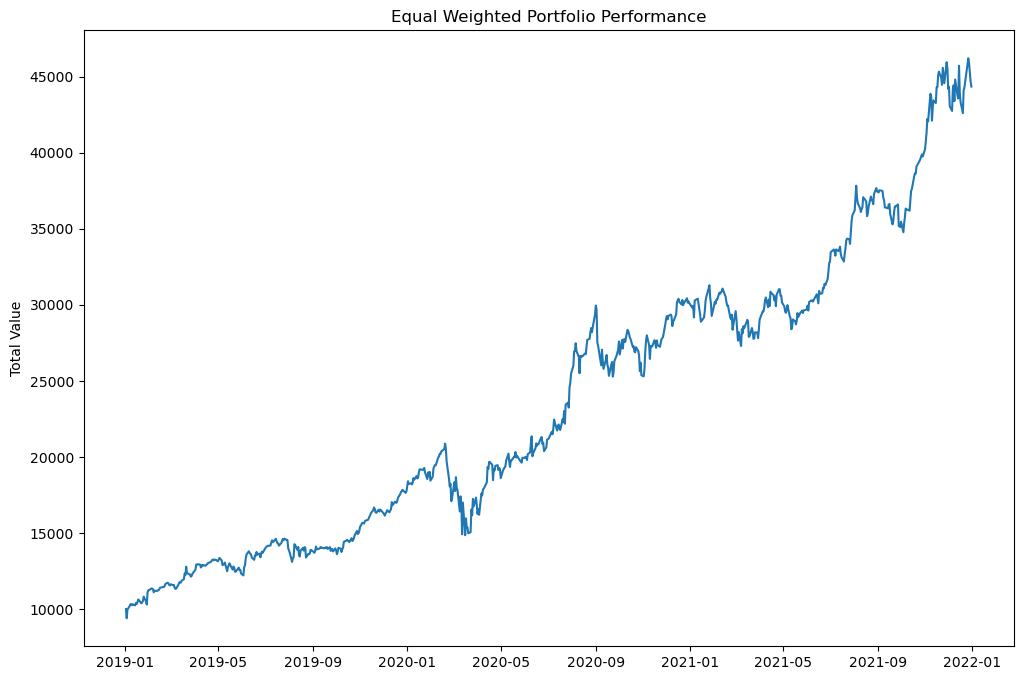

In [18]:
#view total portfolio

#set size of portfolio
plt.figure(figsize=(12,8))
plt.plot(position_values['Total'])
plt.title('Equal Weighted Portfolio Performance')
plt.ylabel('Total Value');

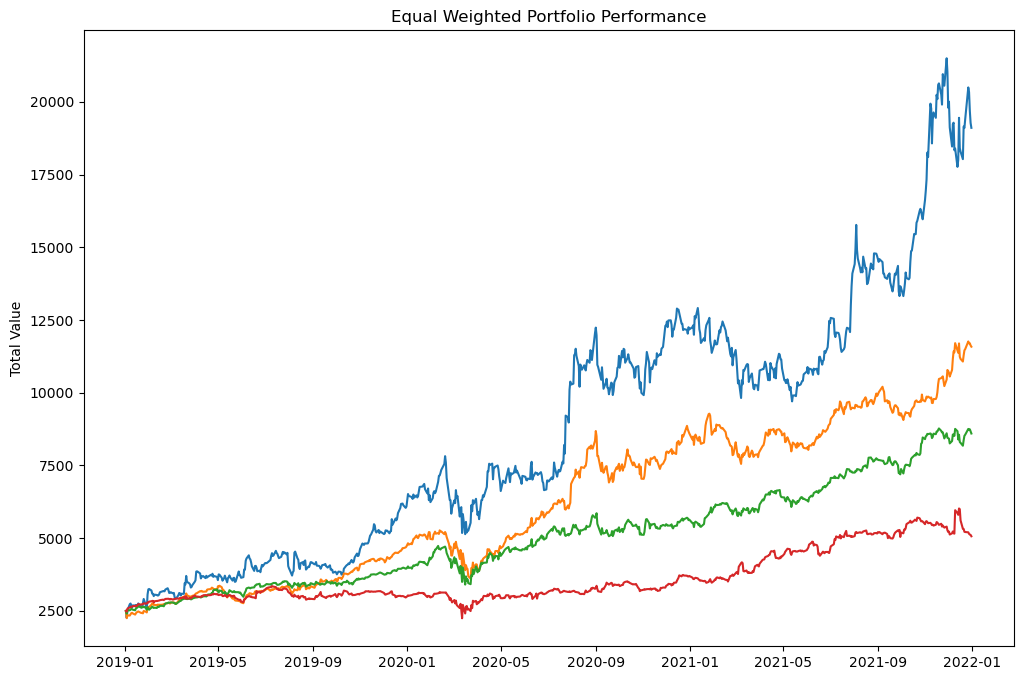

In [20]:
#view the four stocks individually

plt.figure(figsize=(12,8))
plt.plot(position_values.iloc[:, 0:4])
plt.title('Equal Weighted Portfolio Performance')
plt.ylabel('Total Value');

In [21]:
#Calculating Performance Metrics for the Portfolio 
#Cumulative Return
#Mean Daily Return
#Standard Deviation Daily Return
#Sharpe Ratio
#Annualized Sharpe Ratio



#define the end and start value of the portfolio to calculate cumulative reutnr

end_value=position_values['Total'][-1]
start_value=position_values['Total'][0]

#calculate cumulative return

cumulative_return=end_value/start_value-1

In [22]:
print(cumulative_return)

3.435342128605445


In [23]:
#create a "Daily Return" column

position_values['Daily Return']=position_values['Total'].pct_change()

In [24]:
position_values.head()

,AMD,AAPL,MSFT,ORCL,Total,Daily Return
Date,,,,,,
2019-01-02,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000,NaN
2019-01-03,2263.674895,2250.981677,2408.029581,2475.674135,9398.360288,-0.060164
2019-01-04,2522.570377,2347.073801,2520.025499,2582.374056,9972.043733,0.061041
2019-01-07,2731.014309,2341.850323,2523.239502,2623.285665,10219.389800,0.024804
2019-01-08,2754.912385,2386.493028,2541.534748,2647.058213,10329.998375,0.010823


In [25]:
#calculate mean

mean_daily_return=position_values['Daily Return'].mean()

In [26]:
print('The mean daily return is;', str(mean_daily_return))

The mean daily return is; 0.00218565077121821


In [27]:
#calculate the standard devation of Daily Return
std_daily_return=position_values['Daily Return'].std()

In [28]:
print('The standard deviation of the Daily Return is:', str(std_daily_return))

The standard deviation of the Daily Return is: 0.020667540331406473


In [29]:
#calcuate sharpe ration. sharpe ratio is a rick-adjusted return metric. 
sharpe_ratio=mean_daily_return /std_daily_return
sharpe_ratio

0.1057528247760033

In [31]:
#calculate the annualized sharpe ratio
sharpe_ratio_annualized=sharpe_ratio*252**0.5
sharpe_ratio_annualized

1.6787740487993679

In [38]:
#PREPARE SCENARIOS TO OPTIMIZE PORTFOLIO 

#create a dict containing the adjusted close for each stock
stock_adj_close = {}

In [41]:
for stock_name, stock_data in stocks.items():
    stock_adj_close[stock_name] = stock_data['Adj Close']

In [42]:
stock_adj_close = pd.DataFrame(data=stock_adj_close)

In [43]:
stock_adj_close.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2019-01-02,18.830000,38.105141,96.874702,42.296158
2019-01-03,17.049999,34.309589,93.310860,41.884602
2019-01-04,19.000000,35.774231,97.650688,43.689800
2019-01-07,20.570000,35.694614,97.775230,44.381962
2019-01-08,20.750000,36.375061,98.484169,44.784157


In [44]:
#create another dict DataFrame to see day over day change 

stock_returns = stock_adj_close.pct_change()

In [45]:
stock_returns.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-0.094530,-0.099607,-0.036788,-0.009730
2019-01-04,0.114370,0.042689,0.046509,0.043099
2019-01-07,0.082632,-0.002226,0.001275,0.015843
2019-01-08,0.008751,0.019063,0.007251,0.009062
